In [ ]:
Analyzing car sales in norway

Objective: To analyze trends, patterns, and factors influencing car sales in Norway, with the aim of understanding
the market dynamics, consumer preferences, and the impact of environmental policies. The analysis will focus on:
Market Trends,Consumer Preferences,Market Segmentation,Competitive Landscape.By leveraging Power BI for visualization
and Python for dataset processing, this project aims to provide insights from the car sales dataset in a visually appealing
and easily understandable format, helping stakeholders make dataset-driven decision 

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
file_path="C:/Users/HP/Downloads/Norway_car_sales_by_make.csv"
print("Reading a File")
file="C:/Users/HP/Downloads/cars_dataset (1).xlsx"
data = pd.read_csv(file_path)
dataset=pd.read_excel(file)


Reading a File


In [58]:
print("File Info",dataset.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72435 entries, 0 to 72434
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         72435 non-null  object 
 1   year          72435 non-null  int64  
 2   price         72435 non-null  int64  
 3   transmission  72435 non-null  object 
 4   mileage       72435 non-null  int64  
 5   fuelType      72435 non-null  object 
 6   tax           72435 non-null  int64  
 7   engineSize    72435 non-null  float64
 8   Make          72435 non-null  object 
dtypes: float64(1), int64(4), object(4)
memory usage: 5.0+ MB
File Info None


In [25]:
print("Describe a File")
print(dataset.describe(include=object).T)

Describe a File
              count unique      top   freq
model         72435    146   Fiesta   6556
transmission  72435      4   Manual  43021
fuelType      72435      5   Petrol  40370
Make          72435      7     Ford  17964


In [27]:
print("Shape")
print(dataset.shape)


Shape
(72435, 9)


In [29]:
print("Null Values in each column:")
print(dataset.isnull().sum())

Null Values in each column:
model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
engineSize      0
Make            0
dtype: int64


In [35]:
import calendar

# Assuming 'dataset' is your datasetFrame
dataset['New_month'] = dataset['Month'].apply(lambda x: calendar.month_name[x])

# Displaying the dataset structure
print("Access File:")
dataset.info()

# Displaying first 5 rows of 'Month' and 'New_month'
print(dataset.loc[1:5, ['Month', 'New_month']])

Access File:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4377 entries, 0 to 4376
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       4377 non-null   int64  
 1   Month      4377 non-null   int64  
 2   Make       4367 non-null   object 
 3   Quantity   4377 non-null   int64  
 4   Pct        4377 non-null   float64
 5   New_month  4377 non-null   object 
dtypes: float64(1), int64(3), object(2)
memory usage: 205.3+ KB
   Month New_month
1      1   January
2      1   January
3      1   January
4      1   January
5      1   January


In [45]:
print(dataset.iloc[2:10,[1,4]])

   year  mileage
2  2016    29946
3  2017    25952
4  2019     1998
5  2016    32260
6  2016    76788
7  2016    75185
8  2015    46112
9  2016    22451


In [39]:
dataset['price'] = dataset['price'].fillna(dataset['price'].mean())


print("/nAfter filling null values:")
print(dataset.isnull().sum()) 


After filling null values:
Year          0
Month         0
Make         10
Quantity      0
Pct           0
New_month     0
dtype: int64


In [60]:
print(dataset.columns)
print(dataset['price'].min())
print(dataset['price'].max())
print(dataset['price'].mode())
print(dataset['price'].mean())
print(dataset['price'].std())
# print(dataset.nlargest(3,'price').head(5))
# print(dataset.nsmallest(3,'price'))

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'engineSize', 'Make'],
      dtype='object')
495
145000
0    9995
Name: price, dtype: int64
16580.158707807
9299.028753602512


In [64]:
print("\nChecking for duplicate rows:")
print(dataset.duplicated())  # This will show the number of duplicate rows

print(dataset.duplicated().sum())  # This will show the number of duplicate rows


Checking for duplicate rows:
0        False
1        False
2        False
3        False
4        False
         ...  
72430    False
72431    False
72432    False
72433    False
72434    False
Length: 72435, dtype: bool
885


In [72]:
print("Check Total Values Count")
# Example: Avoid datetime columns when calling value_counts
for column in dataset.select_dtypes(include=['datetime64']).columns:
    print(f"Skipping datetime column: {column}")
    
for column in dataset.select_dtypes(exclude=['datetime64']).columns:
    print(f"Value counts for {column}:")
    print(dataset[column].value_counts())
    print("\n")
# Convert the DataFrame to string and then apply value_counts
print(dataset.astype(str).value_counts())

Check Total Values Count
Value counts for model:
model
Fiesta             6556
Golf               4863
Focus              4588
Polo               3287
3 Series           2443
                   ... 
RS7                   1
Escort                1
Accent                1
Transit Tourneo       1
Amica                 1
Name: count, Length: 146, dtype: int64


Value counts for year:
year
2019    19031
2017    16227
2016    11377
2018    10111
2015     5584
2020     3316
2014     3053
2013     1989
2012      480
2011      322
2010      234
2009      223
2008      157
2007      114
2006       67
2005       52
2004       32
2003       22
2002       17
2001        8
2000        6
1999        5
1998        4
1997        2
1996        2
Name: count, dtype: int64


Value counts for price:
price
9995     446
8995     379
11995    350
10995    346
12995    346
        ... 
27016      1
28994      1
58994      1
50495      1
3095       1
Name: count, Length: 10418, dtype: int64


Value counts for t

In [76]:
dataset.drop_duplicates(inplace=True)

print("\nAfter dropping duplicates:")
print(dataset.shape)  # Check the shape after removing duplicates


After dropping duplicates:
(71550, 9)


In [78]:
print("Remove Null Values")
dataset.dropna(axis=0,inplace=True)
print(dataset.info())

Remove Null Values
<class 'pandas.core.frame.DataFrame'>
Index: 71550 entries, 0 to 72434
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         71550 non-null  object 
 1   year          71550 non-null  int64  
 2   price         71550 non-null  int64  
 3   transmission  71550 non-null  object 
 4   mileage       71550 non-null  int64  
 5   fuelType      71550 non-null  object 
 6   tax           71550 non-null  int64  
 7   engineSize    71550 non-null  float64
 8   Make          71550 non-null  object 
dtypes: float64(1), int64(4), object(4)
memory usage: 5.5+ MB
None


In [82]:
last_five_rows = dataset.tail(5)
print("last five rows")

print(last_five_rows)

last five rows
         model  year  price transmission  mileage fuelType  tax  engineSize  \
72430      I30  2016   8680       Manual    25906   Diesel    0         1.6   
72431      I40  2015   7830       Manual    59508   Diesel   30         1.7   
72432      I10  2017   6830       Manual    13810   Petrol   20         1.0   
72433   Tucson  2018  13994       Manual    23313   Petrol  145         1.6   
72434   Tucson  2016  15999    Automatic    11472   Diesel  125         1.7   

          Make  
72430  Hyundai  
72431  Hyundai  
72432  Hyundai  
72433  Hyundai  
72434  Hyundai  


<Figure size 1200x800 with 0 Axes>

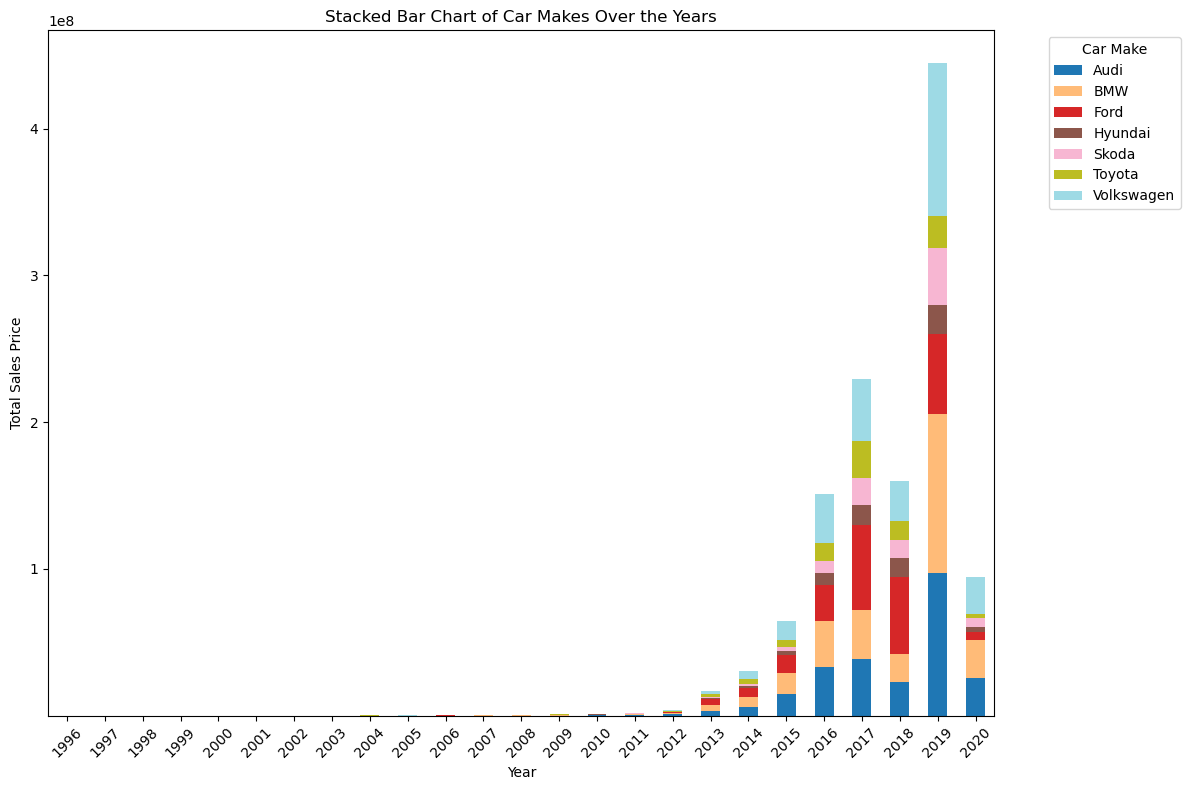

In [102]:

# Aggregate the data by year and Make (Summing the 'price' for now)
sales_by_year_make = dataset.groupby(['year', 'Make'])['price'].sum().unstack(fill_value=0)

# Plot the stacked bar chart
plt.figure(figsize=(12, 8))
sales_by_year_make.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='tab20')

# Customize the plot
plt.title('Stacked Bar Chart of Car Makes Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Sales Price')
plt.xticks(rotation=45)
plt.legend(title='Car Make', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()


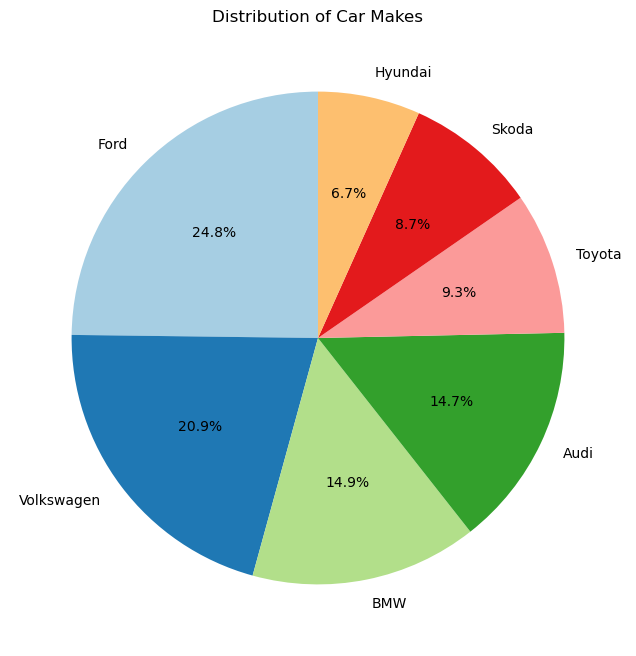

In [104]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the Excel file
file_path = "C:/Users/HP/Downloads/cars_dataset (1).xlsx"
dataset = pd.read_excel(file_path)

# Count the number of cars for each Make
make_counts = dataset['Make'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
make_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Distribution of Car Makes')
plt.ylabel('')  # Hide the y-label
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_15416\233319610.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = matplotlib.cm.get_cmap('tab20', len(make_counts))


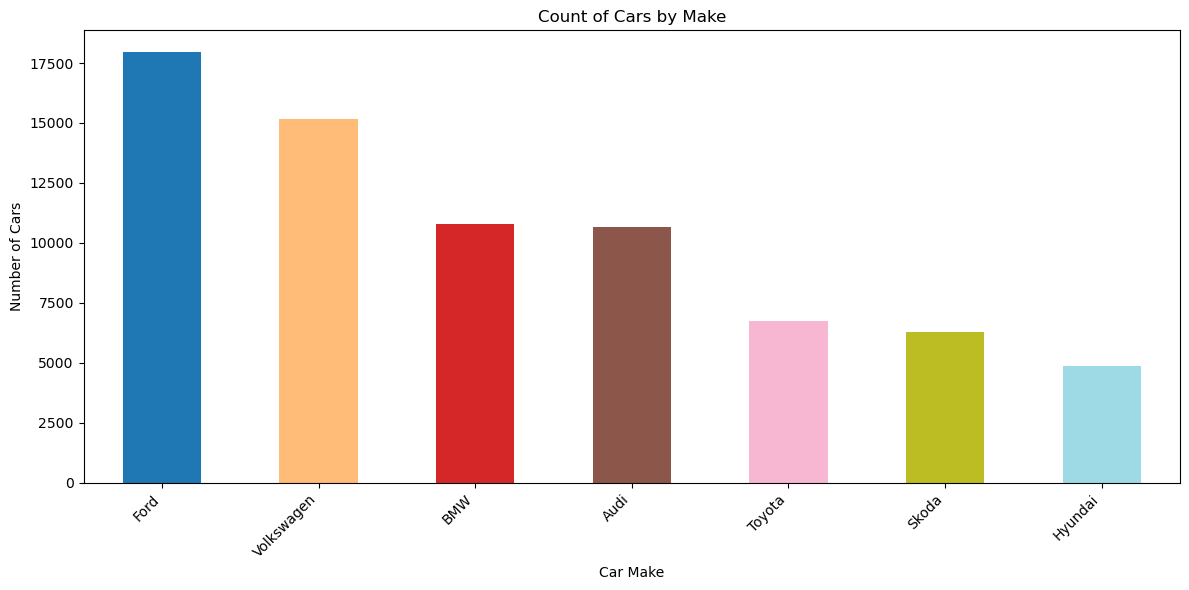

In [121]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib  # Directly use matplotlib instead of the alias

# Read the data from the Excel file
file_path = "C:/Users/HP/Downloads/cars_dataset (1).xlsx"
dataset = pd.read_excel(file_path)

# Count the number of cars for each Make
make_counts = dataset['Make'].value_counts()

# Generate a list of colors for each bar using a colormap (e.g., 'tab20')
colors = matplotlib.cm.get_cmap('tab20', len(make_counts))

# Plotting the bar chart
plt.figure(figsize=(12, 6))
make_counts.plot(kind='bar', color=colors(range(len(make_counts))))

# Customize the plot
plt.title('Count of Cars by Make')
plt.xlabel('Car Make')
plt.ylabel('Number of Cars')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()  # Adjust layout to avoid overlapping
plt.show()


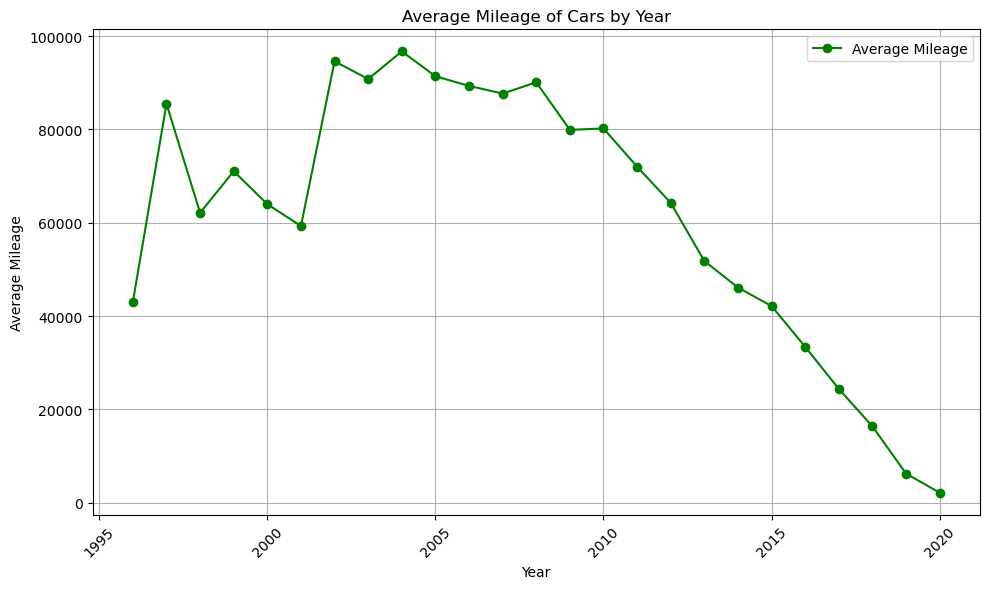

In [123]:
# Group the data by year and calculate the average mileage
avg_mileage_by_year = dataset.groupby('year')['mileage'].mean()

# Plotting the line chart
plt.figure(figsize=(10, 6))
plt.plot(avg_mileage_by_year.index, avg_mileage_by_year.values, marker='o', color='g', label='Average Mileage')

# Customize the plot
plt.title('Average Mileage of Cars by Year')
plt.xlabel('Year')
plt.ylabel('Average Mileage')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()

# Show the plot
plt.tight_layout()  # Adjust layout to avoid overlapping
plt.show()


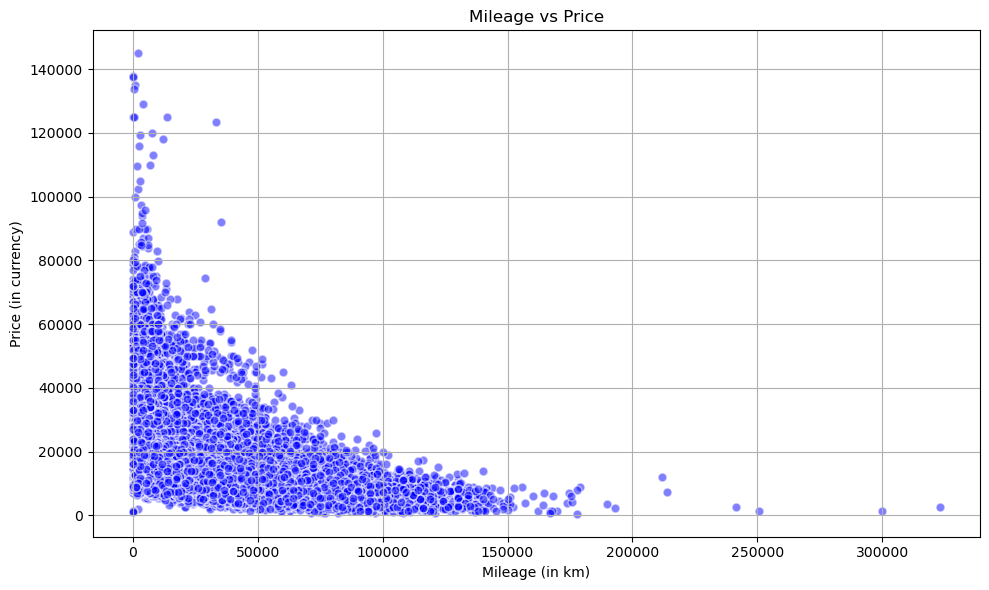

In [127]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the Excel file
file_path = "C:/Users/HP/Downloads/cars_dataset (1).xlsx"
dataset = pd.read_excel(file_path)

# Plotting the scatter chart for Mileage vs Price
plt.figure(figsize=(10, 6))
plt.scatter(dataset['mileage'], dataset['price'], alpha=0.5, color='blue', edgecolors='w', s=40)

# Customize the plot
plt.title('Mileage vs Price')
plt.xlabel('Mileage (in km)')
plt.ylabel('Price (in currency)')
plt.grid(True)

# Show the plot
plt.tight_layout()  # Adjust layout to avoid overlapping
plt.show()


Overall Insights:
Market Trends: The dataset provides an understanding of market trends in terms of car makes, fuel preferences, and the impact of mileage and engine size on pricing. It shows how specific variables like fuel type or engine size can influence the price and demand of vehicles.
Consumer Behavior: The visualizations allow for deeper insights into consumer behavior, such as preferences for fuel-efficient cars, the relationship between a car's age and its price, and how mileage affects the resale value of vehicles.
Opportunities for Growth: For car manufacturers, retailers, and policymakers, understanding these trends can guide strategic decisions. For example, if electric vehicles (EVs) are gaining traction, it may influence future stock decisions or the introduction of more eco-friendly policies

In [131]:
print("Conclusion")

Conclusion


Conclusion
Based on the analysis of the car sales dataset from Norway, using various types of visualizations such as bar charts, doughnut charts, line charts, and scatter plots, several key insights can be drawn:
Car Distribution by Make:
Bar Chart for Car Make Distribution: The analysis of car makes provides insights into which brands are the most popular in Norway. The number of cars sold for each make reveals the market dominance of certain brands, which could influence supply and demand dynamics in the market.
Price and Mileage Trends:
Line Chart for Average Price by Year: The trend of average car prices over the years can highlight shifts in the automotive market, such as price inflation or deflation, and the emergence of new models. It also helps in understanding how pricing strategies may vary over time.
Line Chart for Average Mileage by Year: This chart may reveal trends in vehicle usage and efficiency over time. A rise or fall in average mileage could indicate market preferences for higher fuel-efficiency cars or shifts toward more eco-friendly vehicles.